In [1]:
import csv
import re
import pandas as pd
import numpy as np
import datetime

### Genre Word Cloud

In [52]:
###get the release season of each film
def getseason(path):
    df = pd.read_csv(path)
    season=[]
    for i in df['Release_date']:
        pattern = r'^\w+'                
        match= re.findall(pattern, i)
        print(match)
        if match[0] == 'March' or match[0] =='April' or match[0] =='May':
            season.append('Spring')
        elif match[0] == 'June' or match[0] =='July' or match[0] =='August':
            season.append('Summer')
        elif match[0] == 'September' or match[0] =='October' or match[0] == 'November':
            season.append('Autumn')
        elif match[0] =='December' or match[0] =='January' or match[0] =='February':
            season.append('Winter')
        else:
            season.append(' ')
    df['Season']=season
    return df

In [53]:
path= 'Combine all 3(update).csv'
df = getseason(path)
df

['May']
['June']
['December']
['June']
['July']
['December']
['July']
['November']
['June']
['March']
['September']
['November']
['July']
['March']
['November']
['June']
['October']
['June']
['October']
['November']
['June']
['June']
['March']
['May']
['November']
['December']
['March']
['August']
['November']
['August']
['December']
['September']
['March']
['June']
['September']
['April']
['July']
['December']
['October']
['May']
['September']
['August']
['August']
['April']
['January']
['November']
['August']
['February']
['February']
['May']
['February']
['January']
['October']
['August']
['June']
['December']
['November']
['February']
['February']
['August']
['April']
['July']
['September']
['September']
['August']
['October']
['July']
['July']
['April']
['June']
['July']
['December']
['August']
['August']
['June']
['September']
['October']
['February']
['May']
['January']
['September']
['September']
['March']
['May']
['August']
['August']
['November']
['January']
['October']
['Mar

['August']
['March']
['December']
['May']
['April']
['January']
['October']
['September']
['September']
['October']
['July']
['August']
['September']
['January']
['August']
['October']
['January']
['May']
['September']
['June']
['December']
['March']
['May']
['March']
['May']
['May']
['March']
['January']
['April']
['February']
['February']
['December']
['November']
['September']
['November']
['May']
['November']
['March']
['September']
['April']
['January']
['January']
['February']
['October']
['November']
['November']
['October']
['March']
['November']
['March']
['March']
['November']
['November']
['January']
['May']
['July']
['April']
['April']
['April']
['June']
['September']
['March']
['December']
['July']
['July']
['July']
['July']
['December']
['September']
['January']
['March']
['November']
['November']
['June']
['March']
['August']
['November']
['November']
['October']
['March']
['May']
['February']
['September']
['December']
['April']
['January']
['June']
['August']
['Decembe

,Unnamed: 0,Movie,Release_date,Language,Runtime,Budget,Revenue,Unnamed: 0_x,Name,Genre,Rating,Votes,BoxOffice,Year,Unnamed: 0_y,meter_score,audience_score,Season
0,0,the avengers,"May 4, 2012",English,2h 23m,"$220,000,000.00","$1,519,557,910.00",0.0,The Avengers,"Action, Adventure, Sci-Fi",8.1,1134273.0,"623,357,910",2012.0,0.0,NaN,NaN,Spring
1,1,snow white and the huntsman,"June 1, 2012",English,2h 7m,"$170,000,000.00","$396,600,000.00",16.0,Snow White and the Huntsman,"Action, Adventure, Drama",6.1,253972.0,"155,332,381",2012.0,16.0,48.0,52%,Summer
2,2,the hobbit: an unexpected journey,"December 14, 2012",English,2h 49m,"$250,000,000.00","$1,021,103,568.00",4.0,The Hobbit: An Unexpected Journey,"Adventure, Family, Fantasy",7.9,705872.0,"303,003,568",2012.0,4.0,92.0,86%,Winter
3,3,brave,"June 22, 2012",English,1h 33m,"$185,000,000.00","$538,983,207.00",7.0,Brave,"Animation, Adventure, Comedy",7.1,324942.0,"237,283,207",2012.0,7.0,92.0,86%,Summer
4,4,the dark knight rises,"July 20, 2012",English,2h 45m,"$250,000,000.00","$1,084,939,099.00",1.0,The Dark Knight Rises,"Action, Thriller",8.4,1343225.0,"448,139,099",2012.0,1.0,87.0,90%,Summer
5,5,django unchained,"December 11, 2012",English,2h 45m,"$100,000,000.00","$425,368,238.00",14.0,Django Unchained,"Drama, Western",8.4,1164954.0,"162,805,434",2012.0,14.0,NaN,83%,Winter
6,6,the amazing spider-man,"July 4, 2012",English,2h 16m,"$215,000,000.00","$752,215,857.00",6.0,The Amazing Spider-Man,"Action, Adventure, Sci-Fi",7.0,511325.0,"262,030,663",2012.0,6.0,92.0,86%,Summer
7,7,skyfall,"November 9, 2012",English,2h 23m,"$200,000,000.00","$1,108,561,013.00",3.0,Skyfall,"Action, Adventure, Thriller",7.8,580191.0,"304,360,277",2012.0,3.0,92.0,86%,Autumn
8,8,sexual chronicles of a french family,"June 1, 2012",French,1h 21m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2684.0,0.0,26%,Summer
9,9,the lorax,"March 1, 2012",English,1h 26m,"$70,000,000.00","$348,840,316.00",10.0,The Lorax,"Animation, Adventure, Comedy",6.4,87926.0,"214,030,500",2012.0,10.0,NaN,83%,Spring


In [54]:
###get the occurrence of each genre type
ds = pd.read_csv('Combine all 3(update).csv')
genrelist= []
for i in ds['Genre']:
    for s in (str(i)).split(","):
        s=s.strip()
        if s not in genrelist:
            genrelist.append(s)
# print(genrelist)
genre_occurences=[]
for g in genrelist:
    
    genre_occurences.append([g,ds.Genre.str.count(g).sum()])
# print(genre_occurences)
##drop the 'nan'
genre_occurences = [x for x in genre_occurences if x[0] != 'nan']
def getw(item):
    return item[1]

genre_occurences =sorted(genre_occurences,key=getw,reverse=True)
genre_occurences[:5]

[['Drama', 956.0],
 ['Comedy', 565.0],
 ['Action', 359.0],
 ['Adventure', 293.0],
 ['Thriller', 286.0]]

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

               1
0               
Drama      956.0
Comedy     565.0
Action     359.0
Adventure  293.0
Thriller   286.0
Romance    255.0
Crime      243.0
Horror     189.0
Biography  175.0
Mystery    137.0
Fantasy    111.0
Sci-Fi     105.0
Animation   91.0
History     73.0
Music       66.0
Family      53.0
Sport       37.0
War         23.0
Western     12.0
Musical     10.0


<Figure size 46080x34560 with 0 Axes>

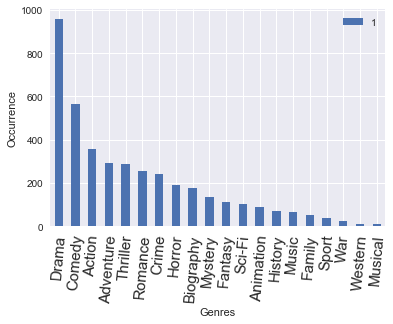

In [7]:
###plot film genre occurrence
dt = pd.DataFrame(genre_occurences,)
dt.set_index(0,inplace=True)
print(dt)
plt.figure(figsize=(640,480))
dt.plot.bar()
plt.xticks(rotation=85, fontsize = 15)
plt.xlabel("Genres")
plt.ylabel("Occurrence")
plt.show()

In [8]:
###define a function to control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

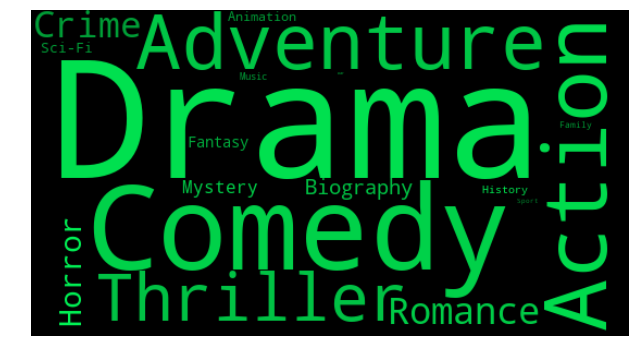

In [9]:
###word cloud of genre occurence
words = dict()
trunc_occurences = genre_occurences[:]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Convert Datetime Series
turn runtime into minutes

In [10]:
df
df1=df.set_index(['Movie'])
dfnew = df1[['Release_date','Language','Runtime','Budget','Revenue','BoxOffice','Genre','Rating','Votes','Year','Season']]
dfruntime=dfnew.dropna(thresh=3)

In [11]:
for x in range(len(dfruntime['Runtime'])):
    if isinstance(dfruntime['Runtime'].iloc[x],str):
        dfruntime['Runtime'].iloc[x]=datetime.datetime.strptime(dfruntime['Runtime'].iloc[x],'%Hh %Mm')

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
for x in range(len(dfruntime['Runtime'])):
    if type(dfruntime['Runtime'].iloc[x])==datetime.datetime:
        a=dfruntime['Runtime'].iloc[x]
        dfruntime['Runtime'].iloc[x]=a.hour*60+a.minute

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
dfruntime

,Release_date,Language,Runtime,Budget,Revenue,BoxOffice,Genre,Rating,Votes,Year,Season
Movie,,,,,,,,,,,
the avengers,"May 4, 2012",English,143,"$220,000,000.00","$1,519,557,910.00","623,357,910","Action, Adventure, Sci-Fi",8.1,1134273.0,2012.0,Spring
snow white and the huntsman,"June 1, 2012",English,127,"$170,000,000.00","$396,600,000.00","155,332,381","Action, Adventure, Drama",6.1,253972.0,2012.0,Summer
the hobbit: an unexpected journey,"December 14, 2012",English,169,"$250,000,000.00","$1,021,103,568.00","303,003,568","Adventure, Family, Fantasy",7.9,705872.0,2012.0,Winter
brave,"June 22, 2012",English,93,"$185,000,000.00","$538,983,207.00","237,283,207","Animation, Adventure, Comedy",7.1,324942.0,2012.0,Summer
the dark knight rises,"July 20, 2012",English,165,"$250,000,000.00","$1,084,939,099.00","448,139,099","Action, Thriller",8.4,1343225.0,2012.0,Summer
django unchained,"December 11, 2012",English,165,"$100,000,000.00","$425,368,238.00","162,805,434","Drama, Western",8.4,1164954.0,2012.0,Winter
the amazing spider-man,"July 4, 2012",English,136,"$215,000,000.00","$752,215,857.00","262,030,663","Action, Adventure, Sci-Fi",7.0,511325.0,2012.0,Summer
skyfall,"November 9, 2012",English,143,"$200,000,000.00","$1,108,561,013.00","304,360,277","Action, Adventure, Thriller",7.8,580191.0,2012.0,Autumn
sexual chronicles of a french family,"June 1, 2012",French,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer


### Basic Stats graph & info

In [14]:
final_df=dfruntime.dropna()

In [15]:
final_df['BoxOffice']=final_df['BoxOffice'].astype('str')
final_df['BoxOffice']= final_df['BoxOffice'].apply(lambda x:x.replace(',',''))
final_df['BoxOffice']=final_df['BoxOffice'].astype('int')

final_df['Votes']=final_df['Votes'].astype('str')
final_df['Votes']=final_df['Votes'].astype('float')

final_df['Revenue']=final_df['Revenue'].astype('str')
final_df['Revenue']= final_df['Revenue'].apply(lambda x:x.replace('$',''))
final_df['Revenue']= final_df['Revenue'].apply(lambda x:x.replace(',',''))
final_df['Revenue']=final_df['Revenue'].astype('float')

final_df['Budget']=final_df['Budget'].astype('str')
final_df['Budget']= final_df['Budget'].apply(lambda x:x.replace('$',''))
final_df['Budget']= final_df['Budget'].apply(lambda x:x.replace(',',''))
final_df['Budget']=final_df['Budget'].astype('float')

final_df['Year']=final_df['Year'].astype('str')
final_df['Year']=final_df['Year'].astype('float')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [16]:
final_df.drop_duplicates()

,Release_date,Language,Runtime,Budget,Revenue,BoxOffice,Genre,Rating,Votes,Year,Season
Movie,,,,,,,,,,,
the avengers,"May 4, 2012",English,143,220000000.0,1.519558e+09,623357910,"Action, Adventure, Sci-Fi",8.1,1134273.0,2012.0,Spring
snow white and the huntsman,"June 1, 2012",English,127,170000000.0,3.966000e+08,155332381,"Action, Adventure, Drama",6.1,253972.0,2012.0,Summer
the hobbit: an unexpected journey,"December 14, 2012",English,169,250000000.0,1.021104e+09,303003568,"Adventure, Family, Fantasy",7.9,705872.0,2012.0,Winter
brave,"June 22, 2012",English,93,185000000.0,5.389832e+08,237283207,"Animation, Adventure, Comedy",7.1,324942.0,2012.0,Summer
the dark knight rises,"July 20, 2012",English,165,250000000.0,1.084939e+09,448139099,"Action, Thriller",8.4,1343225.0,2012.0,Summer
django unchained,"December 11, 2012",English,165,100000000.0,4.253682e+08,162805434,"Drama, Western",8.4,1164954.0,2012.0,Winter
the amazing spider-man,"July 4, 2012",English,136,215000000.0,7.522159e+08,262030663,"Action, Adventure, Sci-Fi",7.0,511325.0,2012.0,Summer
skyfall,"November 9, 2012",English,143,200000000.0,1.108561e+09,304360277,"Action, Adventure, Thriller",7.8,580191.0,2012.0,Autumn
the lorax,"March 1, 2012",English,86,70000000.0,3.488403e+08,214030500,"Animation, Adventure, Comedy",6.4,87926.0,2012.0,Spring


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(1,0.6,'count    1.067000e+03\nmean     4.539978e+07\nstd      5.537854e+07\nmin      1.118000e+04\n25%      1.000000e+07\n50%      2.500000e+07\n75%      5.500000e+07\nmax      5.000000e+08\nName: Budget, dtype: float64')

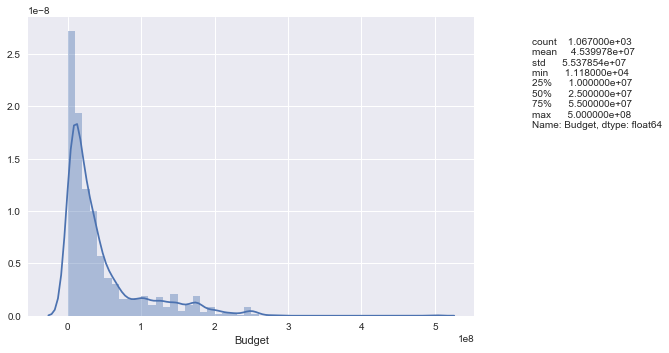

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from scipy import stats
sns.distplot(final_df['Budget'])
plt.figtext(1.0,0.6,final_df['Budget'].describe())

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(1,0.2,'count    1.067000e+03\nmean     1.468203e+08\nstd      2.379588e+08\nmin      5.728000e+03\n25%      1.286068e+07\n50%      5.390975e+07\n75%      1.663500e+08\nmax      2.068224e+09\nName: Revenue, dtype: float64')

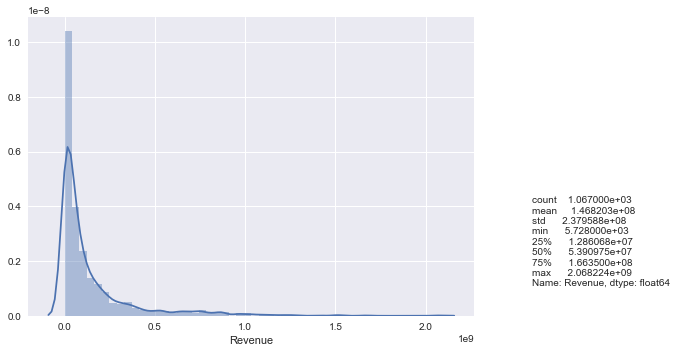

In [18]:
sns.distplot(final_df['Revenue'])
plt.figtext(1.0,0.2,final_df['Revenue'].describe())

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(1,0.2,'count    1.067000e+03\nmean     5.803172e+07\nstd      8.722250e+07\nmin      1.029000e+03\n25%      4.839251e+06\n50%      2.755074e+07\n75%      7.039253e+07\nmax      9.366622e+08\nName: BoxOffice, dtype: float64')

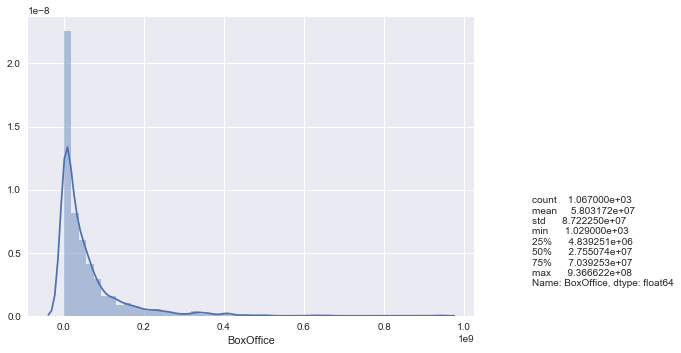

In [19]:
sns.distplot(final_df['BoxOffice'])
plt.figtext(1.0,0.2,final_df['BoxOffice'].describe())

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(1,0.2,'count    1067.000000\nmean        6.500094\nstd         0.904175\nmin         3.100000\n25%         5.900000\n50%         6.500000\n75%         7.100000\nmax         8.600000\nName: Rating, dtype: float64')

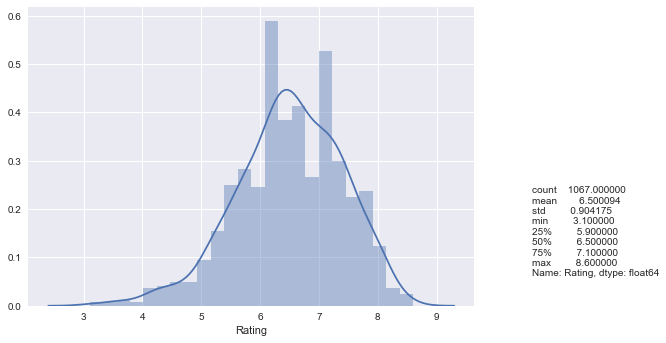

In [20]:
sns.distplot(final_df['Rating'])
plt.figtext(1.0,0.2,final_df['Rating'].describe())

### Time Series Analysis

In [26]:
# import pandas as pd
# csv = 'Combine all 3(update).csv'
# df = pd.read_csv(csv)

In [27]:
from matplotlib import *
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [55]:
df=df.dropna()

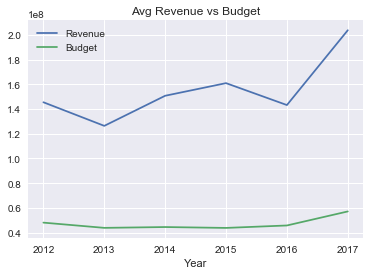

In [57]:
#cleaning
for i in ['Runtime','Revenue','Budget','Rating','BoxOffice','Votes']:
    df=df.dropna(subset=[i])
#conversion
for i in ['Revenue','Budget','Rating','BoxOffice','Votes']:
    df[i]=df[i].astype('str')
    df[i]= df[i].apply(lambda x:x.replace(',',''))
    df[i]= df[i].apply(lambda x:x.replace('$',''))
    df[i]=df[i].astype('float')
    
df.groupby(['Year'])['Revenue'].mean().plot(title='AvgRevenue',legend=True)
df.groupby(['Year'])['Budget'].mean().plot(title='Avg Revenue vs Budget', legend=True)

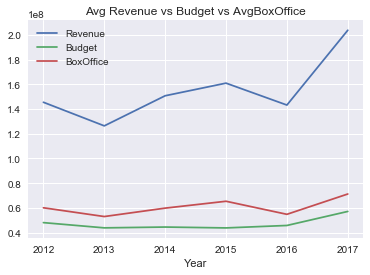

In [30]:
df.groupby(['Year'])['Revenue'].mean().plot(title='AvgRevenue',legend=True)
df.groupby(['Year'])['Budget'].mean().plot(title='Avg Revenue vs Budget', legend=True)
df.groupby(['Year'])['BoxOffice'].mean().plot(title='Avg Revenue vs Budget vs AvgBoxOffice',legend=True)

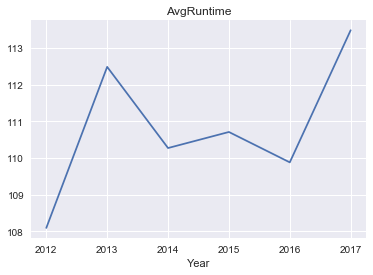

In [31]:
df=df.dropna(subset=['Runtime'])
df['Runtime']= df['Runtime'].apply(lambda x:datetime.datetime.strptime(x,'%Hh %Mm'))
df['Runtime']= df['Runtime'].apply(lambda x: x.hour*60+x.minute)
df.groupby(['Year'])['Runtime'].mean().plot(title='AvgRuntime')

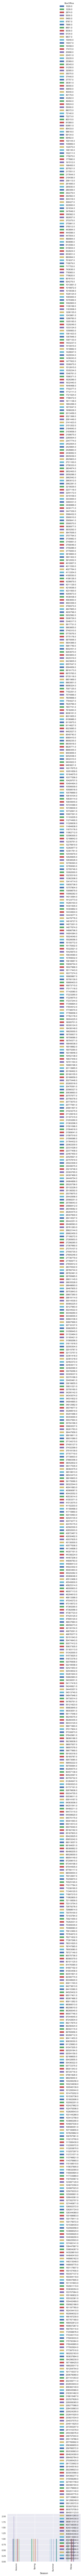

In [60]:
borough_group = df.groupby(['Season','BoxOffice'])
borough_group.size().unstack().plot(kind='bar')

### Getting Correllation Heatmap

In [32]:
data= dfruntime
X_train=data[['Runtime','Budget','Revenue','BoxOffice','Rating','Votes','Year']]
X_train=X_train.fillna(0)
X_train['Revenue']=X_train['Revenue'].astype('str')
X_train['Revenue']= X_train['Revenue'].apply(lambda x:x.replace('$',''))
X_train['Revenue']= X_train['Revenue'].apply(lambda x:x.replace(',',''))
X_train['Revenue']=X_train['Revenue'].astype('float')

X_train['Budget']=X_train['Budget'].astype('str')
X_train['Budget']= X_train['Budget'].apply(lambda x:x.replace('$',''))
X_train['Budget']= X_train['Budget'].apply(lambda x:x.replace(',',''))
X_train['Budget']=X_train['Budget'].astype('float')

X_train['BoxOffice']=X_train['BoxOffice'].astype('str')
X_train['BoxOffice']= X_train['BoxOffice'].apply(lambda x:x.replace(',',''))
X_train['BoxOffice']=X_train['BoxOffice'].astype('float')


X_train
# columns=X_train.columns.tolist()


,Runtime,Budget,Revenue,BoxOffice,Rating,Votes,Year
Movie,,,,,,,
the avengers,143,220000000.0,1.519558e+09,623357910.0,8.1,1134273.0,2012.0
snow white and the huntsman,127,170000000.0,3.966000e+08,155332381.0,6.1,253972.0,2012.0
the hobbit: an unexpected journey,169,250000000.0,1.021104e+09,303003568.0,7.9,705872.0,2012.0
brave,93,185000000.0,5.389832e+08,237283207.0,7.1,324942.0,2012.0
the dark knight rises,165,250000000.0,1.084939e+09,448139099.0,8.4,1343225.0,2012.0
django unchained,165,100000000.0,4.253682e+08,162805434.0,8.4,1164954.0,2012.0
the amazing spider-man,136,215000000.0,7.522159e+08,262030663.0,7.0,511325.0,2012.0
skyfall,143,200000000.0,1.108561e+09,304360277.0,7.8,580191.0,2012.0
sexual chronicles of a french family,81,0.0,0.000000e+00,0.0,0.0,0.0,0.0


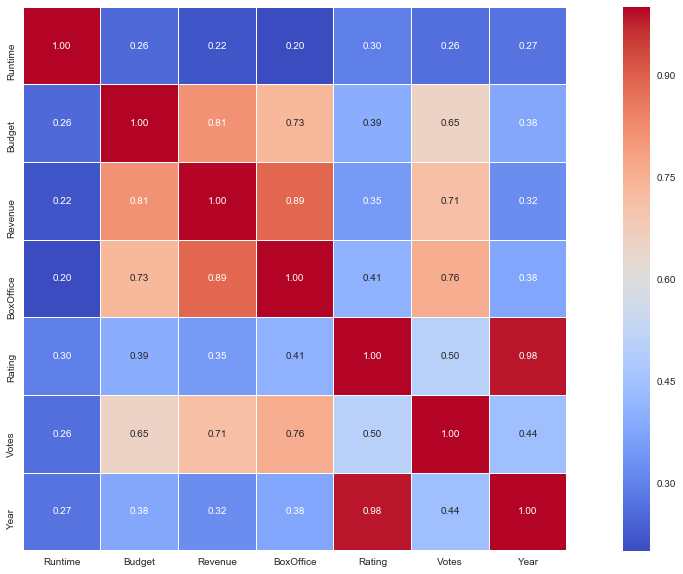

In [33]:
import seaborn as sns
corr_mat=X_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,cbar=True,square=True,annot=True,fmt='.2f', annot_kws={'size': 10}, linewidth = 0.1, cmap = 'coolwarm')


### 3-D Plot 

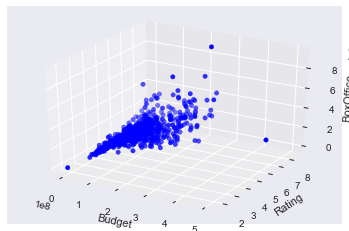

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

df = pd.read_csv(csv)
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
x= X_train['Budget']
z= X_train['BoxOffice']
y= dfruntime['Rating']

ax.scatter(x,y,z,s=20, c='b', marker='o')

ax.set_xlabel('Budget')
ax.set_ylabel('Rating')
ax.set_zlabel('BoxOffice')

plt.show()

### Analysis of Movie Rating Scores

In [37]:
df_combine_all = pd.read_csv('Combine all 3(update).csv')

In [38]:
list_a = []
for item in df_combine_all.index:
    if str(df_combine_all['meter_score'][item]) != 'nan' and str(df_combine_all['audience_score'][item]) != 'nan':
        list_a.append(True)
    else:
        list_a.append(False)

In [39]:
df_update = df_combine_all[list_a]

In [40]:
def change(x):
    try:
        x = int(float(x[:-1]))
    except:
        return np.NaN
    return x

In [41]:
df_update['audience_score'] = df_update['audience_score'].apply(change)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
list_b = []
for item in df_combine_all.index:
    if str(df_combine_all['Rating'][item]) != 'nan':
        list_b.append(True)
    else:
        list_b.append(False)
df_update2 = df_combine_all[list_b]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,"Density Plot of Rotten Tomatoes' Meter Score")

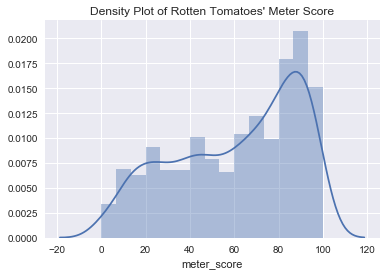

In [43]:
sns.distplot(df_update['meter_score'])
plt.title("Density Plot of Rotten Tomatoes' Meter Score")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,"Density Plot of Rotten Tomatoes' Audience Score")

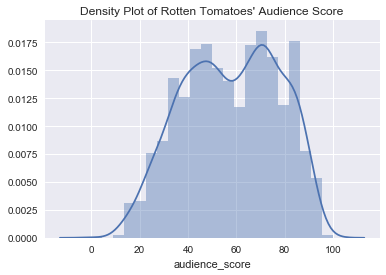

In [44]:
sns.distplot(df_update['audience_score'])
plt.title("Density Plot of Rotten Tomatoes' Audience Score")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,"Density Plot of IMDB' Rating")

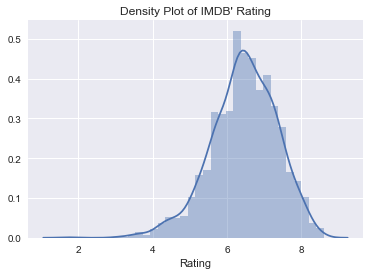

In [45]:
sns.distplot(df_update2['Rating'])
plt.title("Density Plot of IMDB' Rating")

### Comparing audience_score v.s meter_score

In [61]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 4
df['audience_score']=df['audience_score'].astype('str')
df['audience_score']= df['audience_score'].apply(lambda x:x.replace('%',''))
df['audience_score']=df['audience_score'].astype('float')

#define grade range 
A_Above85=[]
A_Above60=[]
A_Above40=[]
A_Below40=[]
for i in range(len(df['audience_score'])):
    if df['audience_score'].iloc[i]>= 85:
        a= X_train['BoxOffice'].iloc[i]
        A_Above85.append(a)
    elif df['audience_score'].iloc[i]<85 and df['audience_score'].iloc[i]>= 60:
        a= X_train['BoxOffice'].iloc[i]
        A_Above60.append(a)
    elif df['audience_score'].iloc[i]<60 and df['audience_score'].iloc[i]>= 40:
        a= X_train['BoxOffice'].iloc[i]
        A_Above40.append(a)
    elif df['audience_score'].iloc[i]< 40 and df['audience_score'].iloc[i]>=0:
        a= X_train['BoxOffice'].iloc[i]
        A_Below40.append(a)
M_Above85=[]
M_Above60=[]
M_Above40=[]
M_Below40=[]        
for i in range(len(df['meter_score'])):
    if df['meter_score'].iloc[i]>= 85:
        b= X_train['BoxOffice'].iloc[i]
        M_Above85.append(b)
    elif i<85 and i>= 60:
        b= X_train['BoxOffice'].iloc[i]
        M_Above60.append(b)
    elif i<60 and i>= 40:
        b= X_train['BoxOffice'].iloc[i]
        M_Above40.append(b)
    elif i< 40 and i>=0:
        b= X_train['BoxOffice'].iloc[i]
        M_Below40.append(b)
A_Above85=sum(A_Above85) / float(len(A_Above85))
A_Above60=sum(A_Above60) / float(len(A_Above60))
A_Above40=sum(A_Above40) / float(len(A_Above40))
A_Below40=sum(A_Below40) / float(len(A_Below40))    
M_Above85=sum(M_Above85) / float(len(M_Above85)) 
M_Above60=sum(M_Above60) / float(len(M_Above60)) 
M_Above40=sum(M_Above40) / float(len(M_Above40)) 
M_Below40=sum(M_Below40) / float(len(M_Below40))

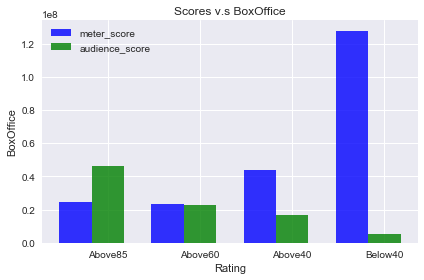

In [88]:
# create plot
means_A=[]
means_M=[]
means_A.append(A_Above85)
means_A.append(A_Above60)  
means_A.append(A_Above40) 
means_A.append(A_Below40)  
means_M.append(M_Above85)
means_M.append(M_Above60)
means_M.append(M_Above40)
means_M.append(M_Below40)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_M, bar_width,
                 alpha=opacity,
                 color='b',
                 label='meter_score')
 
rects2 = plt.bar(index + bar_width, means_A, bar_width,
                 alpha=opacity,
                 color='g',
                 label='audience_score')
 
plt.xlabel('Rating')
plt.ylabel('BoxOffice')
plt.title('Scores v.s BoxOffice')
plt.xticks(index + bar_width, ('Above85', 'Above60', 'Above40', 'Below40'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [1]:
import sys
import tkinter as tk
from tkinter import *
import pandas as pd
import numpy as np

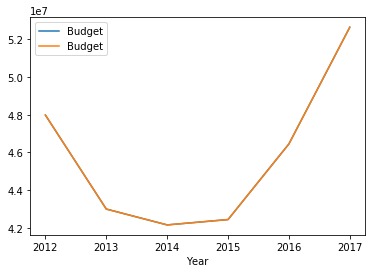

In [4]:
def printData(IMDBrating,Genre,Year):
    
 
    csv = 'Combine all 3(update).csv'
    df = pd.read_csv(csv)
    df=df.drop(['Unnamed: 0'], axis=1)
    df=df.dropna(subset=['Year'])
    df=df.dropna(subset=['Genre'])
    
    df['Rating']=df['Rating'].astype('str')
    df['Year']=df['Year'].astype('int')
    df['Year']=df['Year'].astype('str')
    df['Genre']=df['Genre'].astype('str')
    
    if IMDBrating!='':
        df=df[df['Rating']>=IMDBrating]
    
    if Year!='':
        df=df[df['Year']==Year]
    
    if Genre!='':
        df['ValidGenre'] = df['Genre'].apply(lambda x: True if Genre.lower() in x.lower() else False)
        df=df[df['ValidGenre']==True]
    
    print(df['Movie'])
    
    
def get_input():

    IMDBrating = entry1.get()
    Genre = entry2.get()
    Year = entry3.get()
    printData(IMDBrating,Genre,Year)
    
    
def get_graph():
    
    csv = 'Combine all 3(update).csv'
    df = pd.read_csv(csv)
    
    for i in ['Revenue','Budget','BoxOffice']:
        df=df.dropna(subset=[i])
        
    for i in ['Revenue','Budget','Rating','BoxOffice','Votes']:
        df[i]=df[i].astype('str')
        df[i]= df[i].apply(lambda x:x.replace(',',''))
        df[i]= df[i].apply(lambda x:x.replace('$',''))
        df[i]=df[i].astype('float')

    if Budget.get()==1:
        df.groupby(['Year'])['Budget'].mean().plot(legend=True)
    if Revenue.get()==1:
        df.groupby(['Year'])['Revenue'].mean().plot(legend=True)
    if BoxOffice.get()==1:
        df.groupby(['Year'])['BoxOffice'].mean().plot(legend=True)


root = Tk()

#Label 1
label1 = Label(root,text = 'IMDB rating')
label1.pack()
label1.config(justify = CENTER)

entry1 = Entry(root, width = 30)
entry1.pack()

#Label 2
label2 = Label(root,text = 'Genre')
label2.pack()
label2.config(justify = CENTER)

entry2 = Entry(root, width = 30)
entry2.pack()

#Label 3
label3 = Label(root,text = 'Year')
label3.pack()
label3.config(justify = CENTER)

entry3 = Entry(root, width = 30)
entry3.pack()

#Button 1
button1 = Button(root, text = 'Submit')
button1.pack() 
button1.config(command = get_input)

#ChkBox
Budget = IntVar()
Checkbutton(root, text="Budget", variable=Budget).pack()
Revenue = IntVar()
Checkbutton(root, text="Revenue", variable=Revenue).pack()
BoxOffice = IntVar()
Checkbutton(root, text="BoxOffice", variable=BoxOffice).pack()

#Button 2
button2 = Button(root, text = 'Generate')
button2.pack() 
button2.config(command = get_graph)

root.mainloop()